Path from S to G found: S -> A -> C -> G


{('S', 'A'): Text(0.20987282284343528, -0.1778772441173109, '1'),
 ('S', 'G'): Text(0.7161876948619659, -0.13707806724355073, '10'),
 ('A', 'C'): Text(-0.11235406690008534, -0.6271036103551135, '1'),
 ('A', 'B'): Text(-0.7419500455714689, 0.22685550072723396, '2'),
 ('G', 'C'): Text(0.39396080511844533, -0.5863044334813533, '4'),
 ('G', 'D'): Text(0.10929504517510144, 0.3239181330349641, '2'),
 ('B', 'D'): Text(-0.6038336279618813, 0.7641816775986648, '5')}

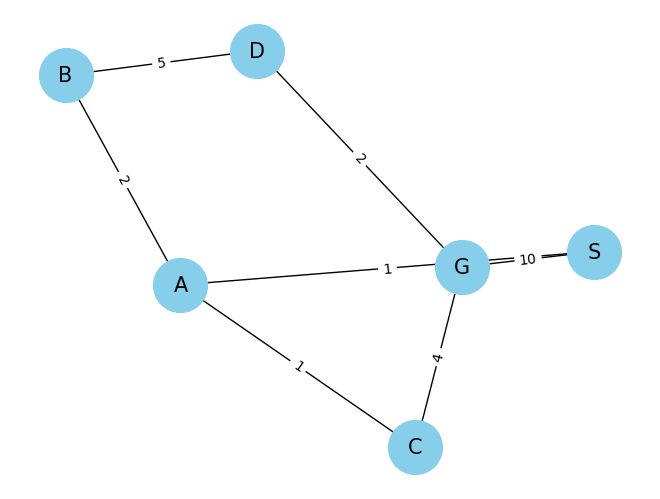

In [12]:
import networkx as nx
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], [start]))  # Initial state: f = g + h = 0 + heuristic

    while not pri_queue.empty():
        f, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                g = graph[current_node][neighbor]['weight']  # Cost from start to current node
                new_path = current_path + [neighbor]
                pri_queue.put((g + heuristic[neighbor], new_path))

    return []  # Goal not found


# Example graph
G = nx.Graph()
G.add_weighted_edges_from([('S', 'A', 1), ('S', 'G', 10), ('A', 'C', 1), ('A', 'B', 2), ('B', 'D', 5),('C', 'G', 4),('D', 'G', 2)])

start_node = 'S'
goal_node = 'G'

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = astar(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))



nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


Path from S to G found: S -> A -> C -> G
Total cost: 6


{('S', 'A'): Text(-0.19196580787996625, -0.2027439885639471, '1'),
 ('S', 'G'): Text(-0.1938282299918636, -0.7069227930274443, '10'),
 ('A', 'C'): Text(-0.6010545923882689, 0.1568914018237705, '1'),
 ('A', 'B'): Text(0.2840416456727085, 0.7135099634415834, '2'),
 ('G', 'C'): Text(-0.6029170145001662, -0.3472874026397267, '4'),
 ('G', 'D'): Text(0.30686956981898905, -0.12943905301501846, '2'),
 ('B', 'D'): Text(0.7948828223801327, 0.5500313912036741, '5')}

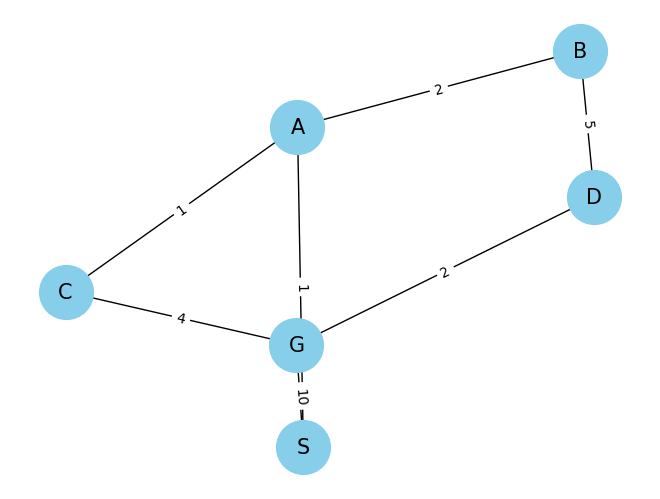

In [1]:
import networkx as nx
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def astar(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((0 + heuristic[start], 0, [start]))  # (f, g, path)

    while not pri_queue.empty():
        f, g, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path, g  # Return path and total cost

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_g = g + graph[current_node][neighbor]['weight']  # Accumulate cost
                new_path = current_path + [neighbor]
                pri_queue.put((new_g + heuristic[neighbor], new_g, new_path))

    return [], float('inf')  # Goal not found


# Example graph
G = nx.Graph()
G.add_weighted_edges_from([('S', 'A', 1), ('S', 'G', 10), ('A', 'C', 1), ('A', 'B', 2), ('B', 'D', 5), 
                           ('C', 'G', 4), ('D', 'G', 2)])

start_node = 'S'
goal_node = 'G'

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path, total_cost = astar(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
    print("Total cost:", total_cost)
else:
    print("No path found from {} to {}".format(start_node, goal_node))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)


In [8]:
G['S']['A']['weight']

1